## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe() 

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Ignoring availability,area_type and society columns

In [6]:
df1 = df.drop(['availability','society','area_type'],axis=1)

Dealing with null values:

In [7]:
df1.isna().sum() 

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

Removing "balcony" column, as it is containing more null points

In [8]:
df1 = df1.drop('balcony',axis=1)

Removing rows containing 'size' and 'location' as null value

In [9]:
df1 = df1.dropna(subset=['location','size'])
df1.isna().sum()

location       0
size           0
total_sqft     0
bath          57
price          0
dtype: int64

Replacing null values of 'bath' column with mean

In [10]:
mean_value = round(df1['bath'].mean()) 
df1.fillna(value=mean_value, inplace=True) 
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Observing 'size' coulmn, as Bedroom is equivalent to BHK, creating new 'BHK' column and dropping size column

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df1['BHK'] = df1['size'].apply(lambda x: x[:1])
df1 = df1.drop('size',axis=1)
df1.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


Observing 'total_sqft' column, converting possible strings to floats , taking averages of ranges(if given) , ignoring remaining rows

In [13]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def can_be_float(str):
    try:
        float(str)
    except:
        return False
    return True
        
df2 = df1[~df1['total_sqft'].apply(can_be_float)]


In [15]:
df2['total_sqft'].unique() 

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '4125Perch', '1120 - 1145',
       '4400 - 6640', '3090 - 5002', '4400 - 6800', '1160 - 1195',
       '1000Sq. Meter', '4000 - 5249', '1115 - 1130', '1100Sq. Yards',
       '520 - 645', '1000 - 1285', '3606 - 5091', '650 - 665',
       '633 - 666', '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116',
       '850 - 1093', '1440 - 1884', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '660 - 670', '1500Sq. Meter', '620 - 933', '142.61Sq. Meter',
       '2695 - 2940', '1574Sq. Yards', '3450 - 3472', '1250 - 1305',
       '670 - 980', '1005.03 - 1252.49', '1004 - 1204', '361.33Sq. Yards',
       '645 - 936', '2710 - 3360', '2249.81 - 4112.19', '3436 - 3643',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '9

In [16]:
def converting_to_float(str):
    x = str.split('-')
    if len(x)==2: return (float(x[0]) + float(x[1]) )/2
    else:
        if can_be_float(str): return float(str)
    return None

df1['total_sqft'] = df1['total_sqft'].apply( converting_to_float )

In [17]:
df1['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13303, dtype: float64

## Data Visualization

In [18]:
df1.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


<Axes: xlabel='price', ylabel='Count'>

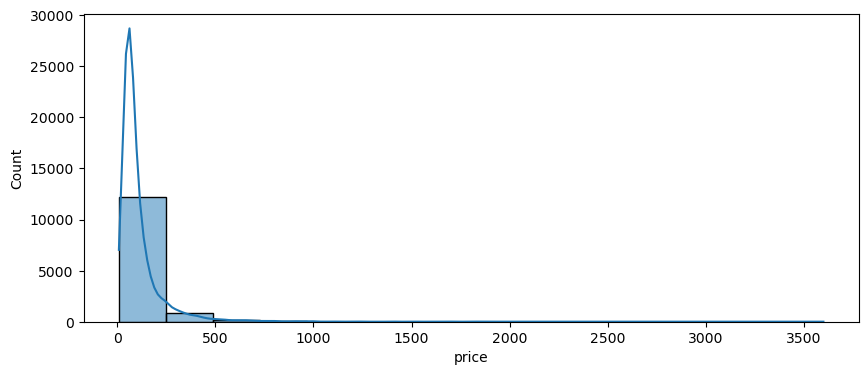

In [19]:
plt.figure(figsize=[10,4])
sns.histplot(x='price',data=df1,bins=15,kde=True)

Observing prices in different areas

Text(0.5, 1.0, 'Prices for different no.of bathrooms')

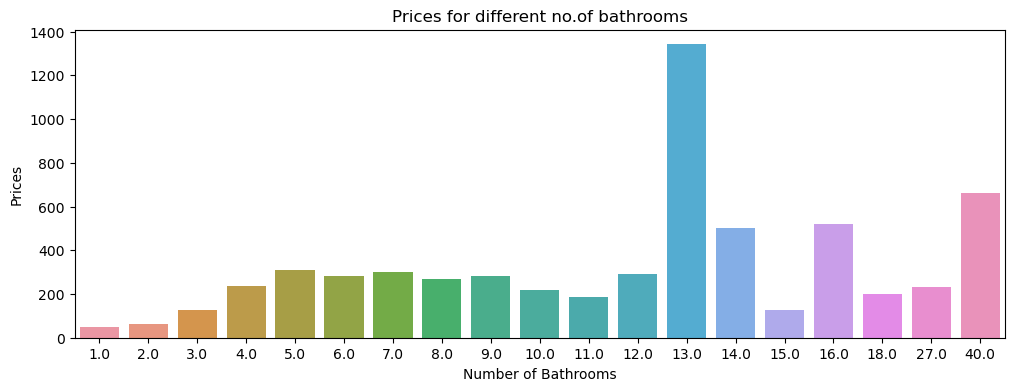

In [20]:
plt.figure(figsize=[12,4])
sns.barplot(x='bath',y='price',data=df1,ci=None)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Prices')
plt.title('Prices for different no.of bathrooms')

Observing prices for different BHK 

Text(0.5, 1.0, 'Prices for different BHK')

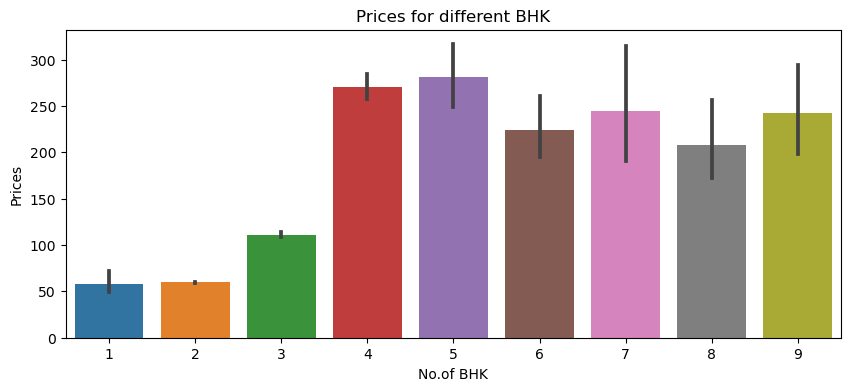

In [21]:
df3 = df1.sort_values(by='BHK')
plt.figure(figsize=[10,4])
sns.barplot(x='BHK',y='price',data=df3)
plt.xlabel('No.of BHK')
plt.ylabel('Prices')
plt.title('Prices for different BHK')

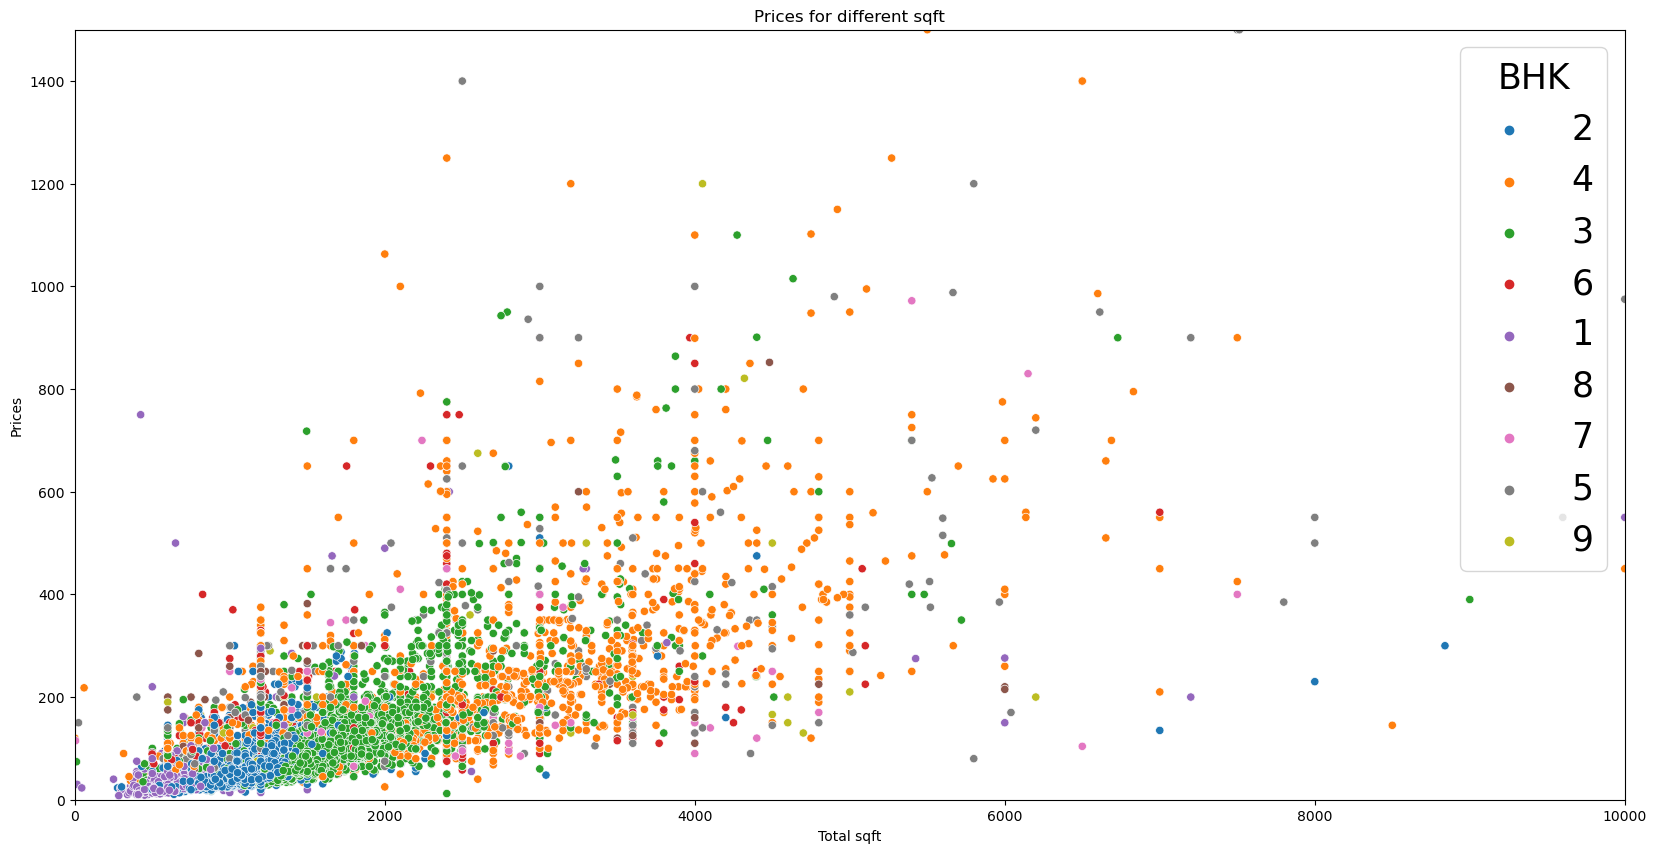

In [22]:
plt.figure(figsize=[20,10])
sns.scatterplot(x='total_sqft',y='price',data=df1,hue='BHK')
plt.xlabel('Total sqft')
plt.ylabel('Prices')
plt.title('Prices for different sqft')
plt.xlim(0,10000);
plt.ylim(0,1500);
plt.legend(fontsize=25,title='BHK',title_fontsize=25);

## Outliers

In [23]:
df4 = df1.copy()
df4['price_per_sqft'] = (df1['price']*1e5)/df1['total_sqft']
df4.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [24]:
df4.shape

(13303, 6)

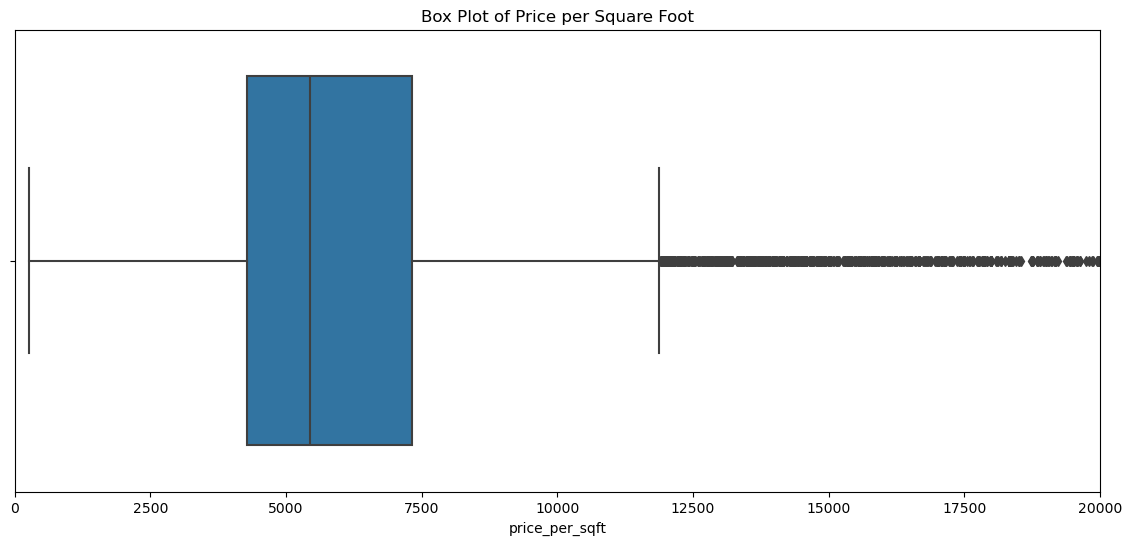

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df4,x='price_per_sqft')
plt.title('Box Plot of Price per Square Foot')
plt.xlim(0,2e4);

In [26]:
# Defining the lower and upper percentiles
lower_percentile = 0.2
upper_percentile = 0.8

# Calculating the bounds
lower_bound = df4['price_per_sqft'].quantile(lower_percentile)
upper_bound = df4['price_per_sqft'].quantile(upper_percentile)

# Removing outliers
df5 = df4[(df4['price_per_sqft'] >= lower_bound) & (df4['price_per_sqft'] <= upper_bound)]

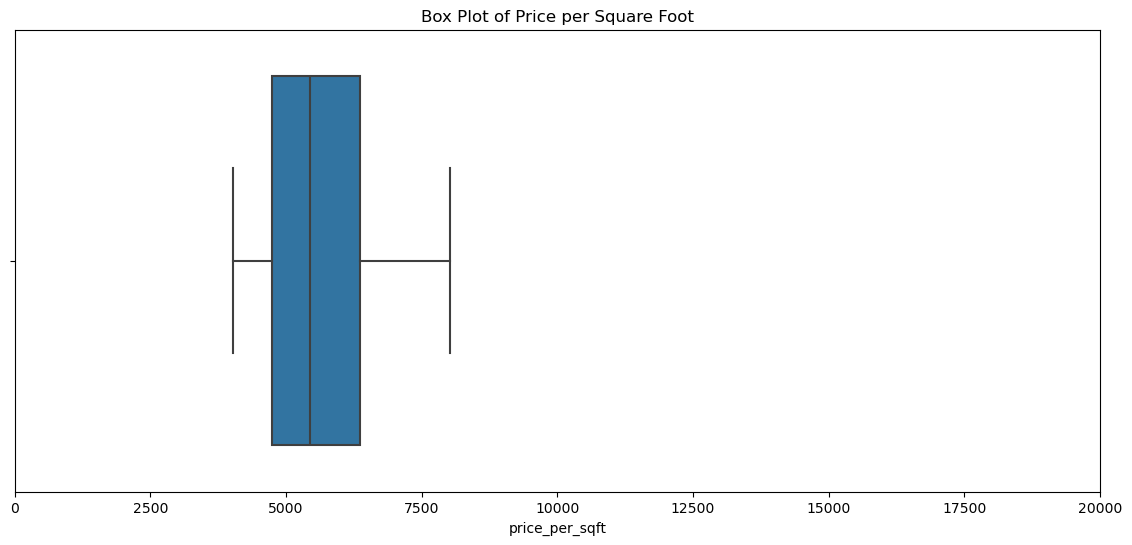

In [27]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df5,x='price_per_sqft')
plt.title('Box Plot of Price per Square Foot')
plt.xlim(0,2e4);

Removing the rows which has very more bathrooms than BHKs

In [28]:
df5['BHK'] = df5['BHK'].astype(float)
df6 = df5[df5['bath']<df5['BHK']+2]

<Axes: xlabel='bath', ylabel='count'>

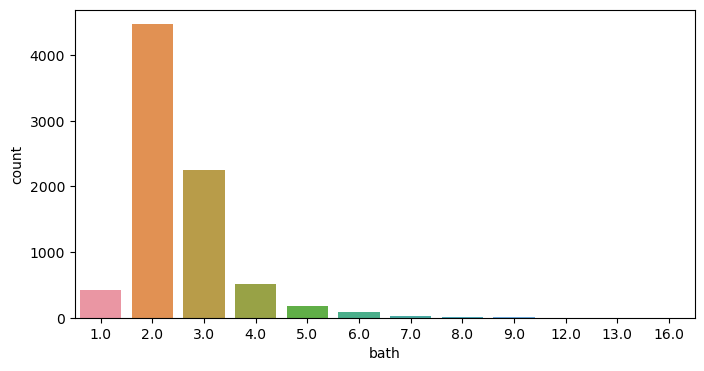

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(data=df5,x='bath')

Dropping 'price_per_sqft' coulmn, as it is used only for outlier detection

In [30]:
df6 = df6.drop('price_per_sqft',axis=1)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7880 entries, 1 to 13317
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7880 non-null   object 
 1   total_sqft  7880 non-null   float64
 2   bath        7880 non-null   float64
 3   price       7880 non-null   float64
 4   BHK         7880 non-null   float64
dtypes: float64(4), object(1)
memory usage: 369.4+ KB


<Axes: xlabel='bath', ylabel='count'>

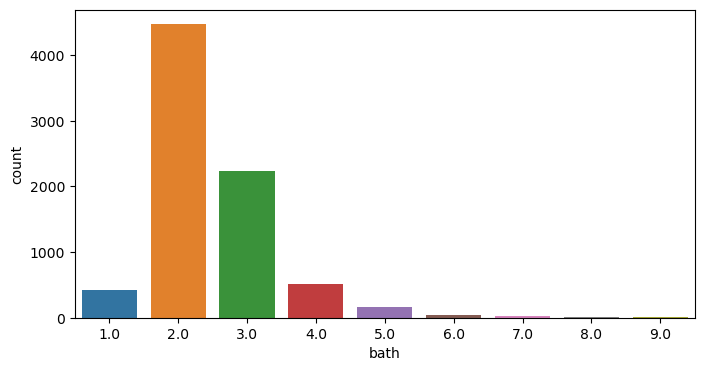

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data=df6,x='bath')

In [32]:
df6.shape

(7880, 5)

## Feature Engineering

In [33]:
df6['location'].unique()

array(['Chikka Tirupathi', 'Uttarahalli', 'Lingadheeranahalli',
       'Kothanur', 'Old Airport Road', 'Marathahalli', 'Sarjapur',
       'Mysore Road', 'Bisuvanahalli', 'Manayata Tech Park', 'Binny Pete',
       'Bellandur', ' Thanisandra', 'Mangammanapalya', 'Whitefield',
       'Ramagondanahalli', 'Electronic City', 'Yelahanka', 'Hebbal',
       'Kasturi Nagar', 'Kanakpura Road', 'Electronics City Phase 1',
       'Kundalahalli', 'Chikkalasandra', 'Murugeshpalya', 'Ganga Nagar',
       'Himagiri Meadows', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Devanahalli', 'Govindaraja Nagar Ward', 'Tharabanahalli',
       'Bommanahalli', 'Doddathoguru', 'Devarachikkanahalli',
       'Begur Road', 'Hegde Nagar', 'Haralur Road', 'Hennur Road',
       'Kaval Byrasandra', 'ISRO Layout', 'Kodanda Reddy Layout',
       'Garudachar Palya', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       ' Mysore Highway', 'Thanisandra', 'Domlur', 'Devasthanagalu',
       'T Dasarahalli', 'Yeshwanthpur', 'Gre

In [34]:
len(df6['location'].unique())

914

There are too many loctaions, to increase efficiency of the model, reducing its size

In [35]:
locations = df6.groupby('location')['location'].count().sort_values()
locations

location
 Anekal                   1
Nrupathunga Nagar         1
Off Bannergatta Road      1
Off Bannergatta road      1
Divya Unnathi Layout      1
                       ... 
Electronic City         168
Thanisandra             171
Kanakpura Road          227
Sarjapur  Road          278
Whitefield              366
Name: location, Length: 914, dtype: int64

In [36]:
locations_others = locations[locations<=20]
len(locations_others)

825

There are 914 unique locations, among them 825 has less than 20 data points, converting these as 'others'

In [37]:
df6['location'] = df6['location'].apply (lambda x: 'other' if x in locations_others else x)
len(df6['location'].unique())

90

Converting object columns to integers using dummy variables

In [38]:
dummies = pd.get_dummies(df6['location']).astype(int)
dummies.head(5)

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,Ardendale,Balagere,Banashankari,Bannerghatta Road,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur,other
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df6 = df6.drop(['location'],axis=1)
df7 = pd.concat([df6,dummies.drop('other',axis=1)],axis=1)

## ML Model 

Creating a Machine Learning model to predict the price

In [40]:
df7.head()

,total_sqft,bath,price,BHK,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,...,Thigalarapalya,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur
1,2600.0,5.0,120.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.0,3.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1521.0,3.0,95.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X = df7.drop('price',axis=1)
y = df7['price']

In [42]:
X.shape

(7880, 92)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Checking which model among ElasticNet, Linear Regression , support vector regression and ensemble regressors is best 

In [45]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.9154504369726023

In [47]:
en_model = ElasticNet(alpha = 0.1,l1_ratio=0.5)
en_model.fit(X_train, y_train)
en_model.score(X_test, y_test)

0.9057608033077164

In [48]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9102254099920849

In [49]:
ab_model = AdaBoostRegressor()
ab_model.fit(X_train, y_train)
ab_model.score(X_test, y_test)

0.8815693907042965

In [50]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_model.score(X_test, y_test)

0.9149650712146019

In [51]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_model.score(X_test, y_test)

0.49257578782752576

Linear Regression and Gradient Boosting Regression gave highest score of nearly 91.5% among all

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
def best_model(X_train,y_train):
    models = {
        'ElasticNet': {
            'model': ElasticNet(),
            'params': {
                'alpha': [0.1, 1],
                'l1_ratio': [0.2,0.7]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20]
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 10],
                'kernel': ['linear','rbf']
            }
        }
    }
    # Dictionary to store the best models and their respective scores
    scores = []
    
    # Performing GridSearchCV for each model
    for name, model_info in models.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'],cv=3,n_jobs=-1)
        grid_search.fit(X_train, y_train)
        scores.append({
                "model": name,
                "best_score": grid_search.best_score_,
                "best_params": grid_search.best_params_
        })
    
    return pd.DataFrame(scores, columns = ["model", "best_score","best_params"])


In [54]:
# best_model(X_train, y_train)

Taking Linear regression as best model

In [55]:
final_model = lr_model

In [56]:
y_pred = final_model.predict(X_test)
y_pred

array([118.30480742,  70.66115801,  98.79322614, ...,  20.80934526,
        58.83645544,  92.06921952])

Errors:

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [58]:
rms = np.sqrt(mse)
rms

16.90189096039166

In [59]:
mae

11.772617872272413

In [60]:
r2

0.9154504369726023

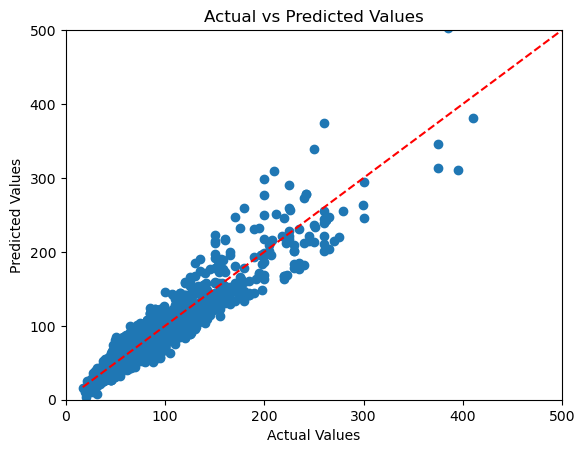

In [61]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
# y = x line
plt.plot(np.unique(y_test), np.unique(y_test), color='red', linestyle='--')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlim(0,500);
plt.ylim(0,500);

## Predicting Prices

In [62]:
def predict_price(location,total_sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1
        
    return final_model.predict([x])[0]

Examples:

In [63]:
predict_price('5th Phase JP Nagar',1000, 2, 2) 

44.3447897332036

In [64]:
predict_price('Yeshwanthpur',3000, 3, 4)

184.78287536986863

## Exporting the model

In [65]:
import pickle
with open('Bengaluru_House_Data.pickle','wb') as f:
    pickle.dump(final_model,f)

In [66]:
import json
columns = { 'data_columns': [col.lower() for col in X.columns] }
with open("columns.json","w") as f:
    f.write(json.dumps(columns))